# Tutorial Exercises

This week, you will be investigating attitudes to immigration using data from the <a href='https://www.europeansocialsurvey.org'>European Social Survey (ESS)</a>. 

The ESS is a highly respected survey and uses random sampling to achieve a sample that is representative of the population. The survey includes lots of questions about the social and economic circumstances of the household as well as asking a set of questions on political preferences and attitudes. 

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.graphics as smg
import statsmodels.formula.api as smf

## ESS data

Today’s data file is restricted to respondents in the UK. The outcome measure of interest is ‘better’ and is a score from 0-10 in answer to the following question: “Is the UK made a worse or a better place to live by people coming to live here from other countries?” 0 is labelled as “Worse place to live” and 10 as “better place to live”, or respondents could choose an answer in between. Thus, high scores indicate more open attitudes, i.e., those who feel more positive about the consequences of immigration, and low scores the opposite. 

This file contains several explanatory/ controls variables: 

* age (a continuous measure in years)
* sex (Male, Female)
* educ (a categorical measure with 3 levels, where 'tertiary' is higher education such as university)
* vote (a categorical measure of the party the respondent last voted for where 1 = Conservatives, 2 = Labour, 3 = any other party)
* bornuk (a binary measure of whether the respondent was born in the UK where 0 = the respondent was not born in the UK, and 1 indicates they were).

In [2]:
# load and view the data
ess = pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/immigrationData.csv')
ess

,1,vote,better,bornuk,sex,age,educ
0,2,Conservative,0.0,0,Male,75.0,NaN
1,3,Conservative,7.0,0,Male,70.0,Upper secondary
2,4,Conservative,8.0,0,Female,54.0,Tertiary
3,5,Conservative,0.0,0,Male,58.0,Upper secondary
4,6,Conservative,7.0,0,Male,76.0,Lower secondary
...,...,...,...,...,...,...,...
2199,2201,NaN,9.0,0,Female,32.0,Tertiary
2200,2202,NaN,5.0,0,Female,69.0,Lower secondary
2201,2203,NaN,5.0,0,Female,34.0,Upper secondary
2202,2204,NaN,2.0,0,Male,23.0,Lower secondary


In [3]:
ess.vote.unique()

array(['Conservative', 'Labour', 'Any other party', nan], dtype=object)

### Data cleaning

Get to know your data. 

* How many survey respondents are there? 
* For each variable, check whether there are many missing values.


In [4]:
# Check variable by variable for missing
ess.count()
# Etc.

1         2204
vote      1541
better    2170
bornuk    2204
sex       2204
age       2188
educ      2145
dtype: int64

In [5]:
# There are 2204 respondents in the data set. There are 663 NaNs for vote, 34 for better, 16 for age, 59 for education, and none for bornuk and sex.

### Simple regression model

Some of the common ideas about attitudes to immigration include that younger people tend to be more positive about immigration. Let’s test this idea using regression analysis.


In [6]:
# Your code here to run a regression model Y = better, x = age
# first we run this line to tell statsmodels where to find the data and the explanatory variables
reg_formula = sm.regression.linear_model.OLS.from_formula(data = ess, formula = 'better ~ age')

# then we run this line to fit the regression (work out the values of intercept and slope)
# the output is a structure which we will call reg_results
reg_results = reg_formula.fit()

# let's view a summary of the regression results
reg_results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 better   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     54.53
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           2.18e-13
Time:                        15:36:32   Log-Likelihood:                -5037.7
No. Observations:                2155   AIC:                         1.008e+04
Df Residuals:                    2153   BIC:                         1.009e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7895      0.163     41.652      0.000       6.470       7.109
age           -0.0217      0.003     -7.384      0.000      -0.027      -0.016
==============================================================================
Omnibus:                       59.910   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.900
Skew:                          -0.355   Prob(JB):                     4.41e-13
Kurtosis:                       2.641   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* What does the result tell us? 
* Is the age coefficient positive or negative and how do we interpret the size of the slope?

ANSWER: The age coefficient is negative -0.0217. This means that for each additional year of age, the y variable is 0.0217 points lower. 

### Multiple regression model
We are going to add a further explanatory variable to the model: sex. 
    
This is a string variable with two categories: Male and Female. 

Add sex to your model, keeping age in the model too. You will need to change the formula from `better ~ age` to `better ~ age + sex`


In [7]:
# first we run this line to tell statsmodels where to find the data and the explanatory variables
reg_formula = sm.regression.linear_model.OLS.from_formula(data = ess, formula = 'better ~ age + sex')

# then we run this line to fit the regression (work out the values of intercept and slope)
# the output is a structure which we will call reg_results
reg_results = reg_formula.fit()

# let's view a summary of the regression results
reg_results.summary() # Your code here to run a regression model Y = better, x1 = age, x2 = sex

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 better   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     27.38
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           1.81e-12
Time:                        15:36:32   Log-Likelihood:                -5037.6
No. Observations:                2155   AIC:                         1.008e+04
Df Residuals:                    2152   BIC:                         1.010e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.7683      0.168     40.173      0.000       6.438       7.099
sex[T.Male]     0.0543      0.109      0.500      0.617      -0.159       0.267
age            -0.0217      0.003     -7.398      0.000      -0.028      -0.016
==============================================================================
Omnibus:                       59.845   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.751
Skew:                          -0.354   Prob(JB):                     4.75e-13
Kurtosis:                       2.640   Cond. No.                         177.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* What does the coefficient for sex tell us? 
* Do men or women have more positive attitudes towards immigration? 
* In the new model that includes sex, does the age coefficient change from model 1?

ANSWER: Men have more positive attitudes than women by 0.0543 points. The age coefficient is the same in this model as in the last model (-0.0217).

NB: The eagle-eyed among you might spot that the coefficient for sex is not statistically significant. Well spotted! We will spend more time looking at statistical significance next week.

### Add a categorical variable

Next, we are going to add education as a further explanatory variable. 

* This is a categorical variable - what are its possible values?

In [8]:
ess['educ'].unique()

array([nan, 'Upper secondary', 'Tertiary', 'Lower secondary'],
      dtype=object)

Think:
    
* How many categories does the education variable have? 
* How many dummy variables are needed in the regression model? 

Before you run the model, think about what you expect to see. Do you think the coefficients will be positive or negative? 

ANSWER: Education has three categories - Tertiary, upper secondary, and lower secondary. If there are three categories, we will need two dummy variables. I expect to see that the higher categories (like tertiary) will have a positive coefficient because having a degree is often associated with having more open/ liberal attitudes.


In [9]:
# first we run this line to tell statsmodels where to find the data and the explanatory variables
reg_formula = sm.regression.linear_model.OLS.from_formula(data = ess, formula = 'better ~ age + sex + educ')

# then we run this line to fit the regression (work out the values of intercept and slope)
# the output is a structure which we will call reg_results
reg_results = reg_formula.fit()

# let's view a summary of the regression results
reg_results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 better   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     65.77
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           1.82e-52
Time:                        15:36:32   Log-Likelihood:                -4804.3
No. Observations:                2097   AIC:                             9619.
Df Residuals:                    2092   BIC:                             9647.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   5.5960      0.198     28.298      0.000       5.208       5.984
sex[T.Male]                 0.0138      0.105      0.131      0.896      -0.193       0.220
educ[T.Tertiary]            1.9270      0.140     13.750      0.000       1.652       2.202
educ[T.Upper secondary]     0.6291      0.129      4.891      0.000       0.377       0.881
age                        -0.0152      0.003     -5.208      0.000      -0.021      -0.009
==============================================================================
Omnibus:                       42.646   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.726
Skew:                          -0.337   Prob(JB):                     3.20e-10
Kurtosis:                       2.787   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results indeed show that Tertiary has a positive coefficient. The interpretation is that people with tertiary education have a score of 'better' 1.9270 points higher than people with lower secondary education (this was the omitted category, so we make the comparison to that). People with upper secondary education have a 'better' score 0.6291 points higher than people with lower secondary education.

#### Choosing the reference category

Which category was used as the reference category?

You should be able to tell from the summary table, as there will be no $\beta$ value for the reference category - If we have categories A,B,C and B is the reference, then $\beta_A$ and $\beta_C$ tell us how much the expected value of $y$ increases or decreases in catgories A and C compared to category B.

By default, `statsmodels` chooses the least frequent category as the reference, which in this case is 'lower secondary'. So the $\beta$ values for 'Upper secondary' and 'Tertiary' tells us how much higher the value of 'better' is expected to be for survey respondants with 'Upper secondary' or 'Tertiary' education respectively.

You may wish to choose the reference category. You can do this by using slightly different syntax - for example to choose 'Upper secondary' as teh reference category, in the formula we replace the simple variable name `educ` with the code `C(educ, Treatment(reference="Upper secondary")`

I chose the middle category (Upper secondary) as the reference, so I am expecting opposite signed beta values for those with a level of education below (Lower secondary) or abobve (Tertiary) my reference category.

* Run the model, and check the output.

In [10]:
# first we run this line to tell statsmodels where to find the data and the explanatory variables
reg_formula = sm.regression.linear_model.OLS.from_formula(data = ess, formula = 'better ~ age + sex + C(educ, Treatment(reference="Upper secondary"))')
                                                                                                             
# then we run this line to fit the regression (work out the values of intercept and slope)
# the output is a structure which we will call reg_results
reg_results = reg_formula.fit()

# let's view a summary of the regression results
reg_results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 better   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     65.77
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           1.82e-52
Time:                        15:36:32   Log-Likelihood:                -4804.3
No. Observations:                2097   AIC:                             9619.
Df Residuals:                    2092   BIC:                             9647.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                              6.2251      0.175     35.606      0.000       5.882       6.568
sex[T.Male]                                                            0.0138      0.105      0.131      0.896      -0.193       0.220
C(educ, Treatment(reference="Upper secondary"))[T.Lower secondary]    -0.6291      0.129     -4.891      0.000      -0.881      -0.377
C(educ, Treatment(reference="Upper secondary"))[T.Tertiary]            1.2979      0.125     10.344      0.000       1.052       1.544
age                                                                   -0.0152      0.003     -5.208      0.000      -0.021      -0.009
==============================================================================
Omnibus:                       42.646   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.726
Skew:                          -0.337   Prob(JB):                     3.20e-10
Kurtosis:                       2.787   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation

* How should you interpret the education coefficients in the model? 
* Which is the “omitted category” or “reference group” (these two terms are used interchangeably here). 
* Can you explain in words the relationship between education and immigration attitudes? 

ANSWER: The model now shows education estimates for Lower Secondary and Tertiary, because we have specified Upper secondary as the moitted category. Our interpretation, then, is that - as we saw in our first model - people with tertiary education have a higher score of 'better'. The coefficient has changed here because we are comparing to people with Upper secondary (rather than to lower secondary in our first analysis of education). The coefficient of -0.6291 tells us that people with Lower secondary education have a score of 'better# 0.6291 points lower than those with Upper secondary. 

Overall, looking at the models that include education, we can see that education matters for attitudes to immigration. Those with the highest education have the most positive attitudes, and those with the lowest education have the least positive attitudes, and the middle category of education has a score of 'better' in between. 


### Further categorical variable

What do you think the attitudes will be like of people who are immigrants themselves, versus people who were born in the UK? 

ANSWER: I would expect that people born outside of the UK would be more positive in their views of immigration. 

Let’s test your hypothesis, by adding ‘bornuk’ to the model. This is another binary variable where 0 = born in the UK, and 1 = born outside the UK. 
Run the code. What does it show?

ANSWER: Yes, people born outside the UK on average score 1.1811 points higher on 'better' compared to people born in the UK.

In [11]:
# Your code here to run a regression model Y = better, x1 = age, x2 = sex, x3 = education, x4 = bornuk
# first we run this line to tell statsmodels where to find the data and the explanatory variables
reg_formula = sm.regression.linear_model.OLS.from_formula(data = ess, formula = 'better ~ age + sex + C(educ, Treatment(reference="Upper secondary")) + bornuk')
                                                                                                             
# then we run this line to fit the regression (work out the values of intercept and slope)
# the output is a structure which we will call reg_results
reg_results = reg_formula.fit()

# let's view a summary of the regression results
reg_results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 better   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     65.72
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           6.87e-64
Time:                        15:36:32   Log-Likelihood:                -4775.5
No. Observations:                2097   AIC:                             9563.
Df Residuals:                    2091   BIC:                             9597.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                              5.9264      0.177     33.507      0.000       5.580       6.273
sex[T.Male]                                                            0.0390      0.104      0.375      0.707      -0.165       0.243
C(educ, Treatment(reference="Upper secondary"))[T.Lower secondary]    -0.6699      0.127     -5.274      0.000      -0.919      -0.421
C(educ, Treatment(reference="Upper secondary"))[T.Tertiary]            1.1765      0.125      9.427      0.000       0.932       1.421
age                                                                   -0.0118      0.003     -4.056      0.000      -0.017      -0.006
bornuk                                                                 1.1811      0.155      7.636      0.000       0.878       1.484
==============================================================================
Omnibus:                       44.928   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.767
Skew:                          -0.354   Prob(JB):                     6.99e-11
Kurtosis:                       2.818   Cond. No.                         208.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What about you? Plug your own values into the regression equation and find out what the model predicts YOUR answer to the immigration question to be. (NB: I know you are all still doing your degree! Assume you have finished it for the purpose of this exercise). 

You could use pencil and paper or Excel, or type the equation in a code block as I have done below

In [12]:
# edit this equation - 
# you will need to replace the B values with coefficients from the regression summary table, 
# and the variable names with actual values (so if your age is 20, replace 'age' with 20)
# for categorical variables you need to work out which B value to use - 

# better = B0 + B1*age + B2*sex + B3*education + B4*bornuk

# In the following examples I used 'upper secondary' as the reference category for the categorical variable 'educ'

# For example, for a person who is 41, female and tertiary educated, and was born in the UK, the value should be calculated as follows:
# better = intercept + coef(age)*41 + coef(sex[T.male])*0 + coef(educ[T.tertiary])*1 + coef(bornuk)*1
print(5.9264 + -0.0118*41 + 0.0390*0 + 1.1765*1 + 1.1811*0)

# For example, for a person who is 43, male and lower secondary educated, and was born outside the UK, the value should be calculated as follows:
# better = intercept + coef(age)*43 + coef(sex[T.male])*1 + coef(educ[T.Lower Secondary])*1 + coef(bornuk)*0
print(5.9264 + -0.0118*43 + 0.0390*1 + -0.6699*1 + 1.1811*1)

6.6191
5.9692


### Interaction terms

Finally, we are going to explore the effect of age, according to different political preferences using the ‘vote’ variable. 

We will do this by modelling the effect of 'age' and 'vote' on 'better', and adding an **interaction term** of age:vote to the model.

The code in Python for an interaction between A and B is A:B

In [13]:
# Your code here to run a regression model Y = better, x1 = age, x2 = sex, x3 = vote, x4=age:vote
# first we run this line to tell statsmodels where to find the data and the explanatory variables
reg_formula = sm.regression.linear_model.OLS.from_formula(data = ess, formula = 'better ~ age + sex + vote + age:vote')
                                                                                                                 
# then we run this line to fit the regression (work out the values of intercept and slope)
# the output is a structure which we will call reg_results
reg_results = reg_formula.fit()

# let's view a summary of the regression results
reg_results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 better   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     20.77
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           1.71e-23
Time:                        15:36:32   Log-Likelihood:                -3444.4
No. Observations:                1511   AIC:                             6903.
Df Residuals:                    1504   BIC:                             6940.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    6.9235      0.464     14.909      0.000       6.013       7.834
sex[T.Male]                  0.0403      0.123      0.329      0.742      -0.200       0.281
vote[T.Conservative]        -0.6885      0.589     -1.170      0.242      -1.843       0.466
vote[T.Labour]               1.1944      0.564      2.119      0.034       0.089       2.300
age                         -0.0145      0.008     -1.823      0.068      -0.030       0.001
age:vote[T.Conservative]    -0.0033      0.010     -0.332      0.740      -0.023       0.016
age:vote[T.Labour]          -0.0213      0.010     -2.133      0.033      -0.041      -0.002
==============================================================================
Omnibus:                       41.378   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.572
Skew:                          -0.403   Prob(JB):                     3.46e-10
Kurtosis:                       2.796   Cond. No.                         951.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpretation

The interaction `age:vote` breaks down the relationship between `age` and `better` into three separate relationships for the three categories of `vote`

We can visualize this using `sns.lmeplot` which plots the linear relationship between $x$ and $y$ - if we use the argument `hue='vote'` this will be done separately for each category of `vote`

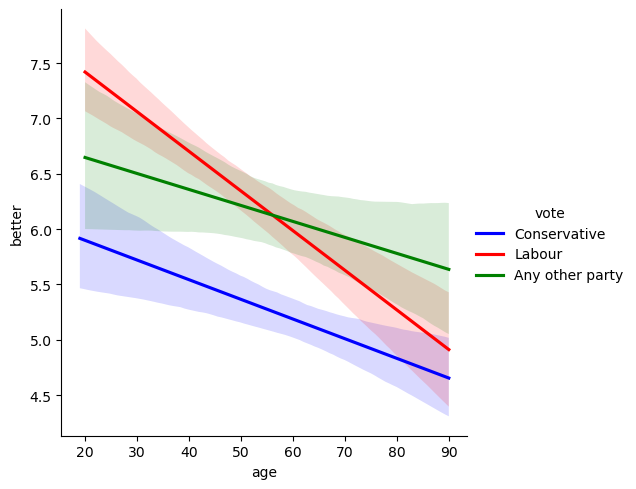

In [14]:
sns.lmplot(data=ess, x='age', y='better', scatter=False, hue='vote',palette={'Labour':'r', 'Any other party':'g', 'Conservative':'b'})
plt.show()

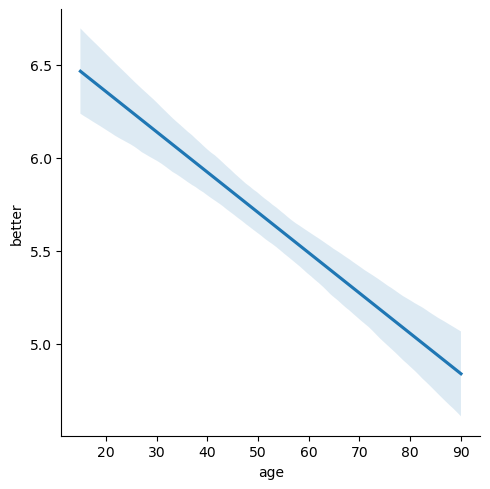

In [15]:
sns.lmplot(data=ess, x='age', y='better', scatter=False, palette={'Labour':'r', 'Any other party':'g', 'Conservative':'b'})
plt.show()

Interpret the results in your own words. 

Check your understanding with your classmates or your tutor. 

(Hint: where is the gap between between Labour and Conservative supporters smaller, and where it is wider?). Does this make sense to you, in terms of people you know? (Do you know many young Conservatives?) 

ANSWER: In all three age groups, the level of 'better' is lower among older people, i.e., suggesting that younger people are more positive about immigration. However, there are also important differences by political preferences. Among people who vote Conservative, the average 'better' is lower, even among young people, than people voting for Labour or another party. A striking feature is that the slope is much steeper for Labour voters, meaning that the difference in attitudes between old and young Labour voters is the much wider than for other parties. The interaction term in the model for Labour is -0.0213 suggesting the slope is stronger by this amount. The change in 'better' for each year of age  among Labour voters is thus 0.0213 points stonger than the 'main effect' of age (which relates to the refence category of Any other party and is -0.0145).

## Further Exercises

1. Can you run 3 separate regression models for Conservative voters, Labour voters, and Other? 
* I'd recommend creating three separate data frames for each political preference

In [16]:
# your code here!

2. Just by eyeballing the coefficients, do you think there might be any other significant interactions?

3. A conceptual question: What other variables would you like to include in the model for explaining attitudes to immigration? (Things that are not included in this data set, but you think are likely to be important. Just assume the measures would be available!)


/opt/anaconda3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

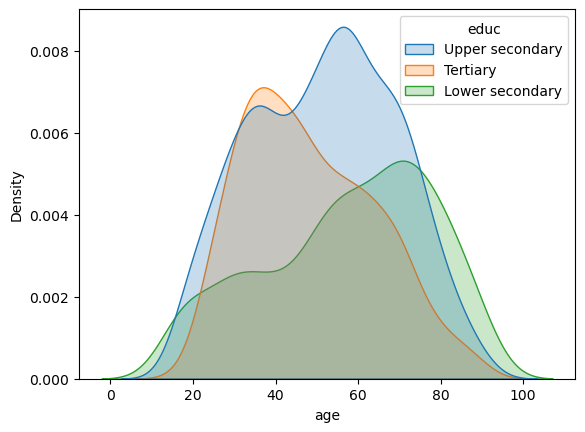

In [17]:
sns.kdeplot(data=ess, x='age', hue='educ', fill=True)

In [18]:
# Your code here to run a regression model Y = better, x = age
# first we run this line to tell statsmodels where to find the data and the explanatory variables
reg_formula = sm.regression.linear_model.OLS.from_formula(data = ess, formula = 'better ~ age + educ + age:educ ')

# then we run this line to fit the regression (work out the values of intercept and slope)
# the output is a structure which we will call reg_results
reg_results = reg_formula.fit()

# let's view a summary of the regression results
reg_results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 better   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     52.93
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           7.49e-52
Time:                        15:36:33   Log-Likelihood:                -4803.5
No. Observations:                2097   AIC:                             9619.
Df Residuals:                    2091   BIC:                             9653.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       5.3726      0.293     18.311      0.000       4.797       5.948
educ[T.Tertiary]                2.4198      0.423      5.724      0.000       1.591       3.249
educ[T.Upper secondary]         0.8786      0.386      2.278      0.023       0.122       1.635
age                            -0.0112      0.005     -2.317      0.021      -0.021      -0.002
age:educ[T.Tertiary]           -0.0095      0.008     -1.230      0.219      -0.025       0.006
age:educ[T.Upper secondary]    -0.0044      0.007     -0.659      0.510      -0.017       0.009
==============================================================================
Omnibus:                       41.379   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.276
Skew:                          -0.331   Prob(JB):                     6.61e-10
Kurtosis:                       2.784   Cond. No.                         666.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
np.nanmean()

np.mean()

TypeError: nanmean() missing 1 required positional argument: 'a'